In [ ]:
from google.colab import files #library untuk upload file
uploaded = files.upload()

import pandas as pd #library pandas

Saving bbc-text.csv to bbc-text (7).csv


In [ ]:
# Inisiasi directory tempat data akan dibaca
import io
data = pd.read_csv(io.BytesIO(uploaded['bbc-text.csv']))

In [ ]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
len(data) #terdapat 2225 sampel 

2225

In [ ]:
data.shape #terdapat 2225 baris dan 2 kolom

(2225, 2)

In [ ]:
import re #library regular expression

In [ ]:
data['text-cleaned']=data.text.apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x))

In [ ]:
data['text-cleaned']=data['text-cleaned'].apply(lambda x: x.lower())

In [ ]:
data['text-cleaned']=data['text-cleaned'].apply(lambda x:x.strip())

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
stopwords=stopwords.words("english")

In [ ]:
data['text-cleaned']=data['text-cleaned'].apply(lambda x : ' '.join([words for words in x.split() if words not in stopwords])) 

In [ ]:
print("Text sebelum dilakukan cleaning : {}".format(data.text[1]))

Text sebelum dilakukan cleaning : worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request

In [ ]:
print("Text setelah dilakukan cleaning : {}".format(data['text-cleaned'][1]))

Text setelah dilakukan cleaning : worldcom boss left books alone former worldcom boss bernie ebbers accused overseeing bn bn fraud never made accounting decisions witness told jurors david myers made comments questioning defence lawyers arguing mr ebbers responsible worldcom problems phone company collapsed prosecutors claim losses hidden protect firm shares mr myers already pleaded guilty fraud assisting prosecutors monday defence lawyer reid weingarten tried distance client allegations cross examination asked mr myers ever knew mr ebbers make accounting decision aware mr myers replied ever know mr ebbers make accounting entry worldcom books mr weingarten pressed replied witness mr myers admitted ordered false accounting entries request former worldcom chief financial officer scott sullivan defence lawyers trying paint mr sullivan admitted fraud testify later trial mastermind behind worldcom accounting house cards mr ebbers team meanwhile looking portray affable boss admission pe grad

In [ ]:
kategori = pd.get_dummies(data.category) #buat dummy dari kolom category yang terdiri dari 5 kategori yaitu business, entertainment, politics, sport dan tech 
new_data = pd.concat([data, kategori], axis=1) #dari dummy kategori digabungkan dengan data
new_data = new_data.drop(columns=['category','text']) #hapus kolom category dan text
new_data #data baru

,text-cleaned,business,entertainment,politics,sport,tech
0,tv future hands viewers home theatre systems p...,0,0,0,0,1
1,worldcom boss left books alone former worldcom...,1,0,0,0,0
2,tigers wary farrell gamble leicester say rushe...,0,0,0,1,0
3,yeading face newcastle fa cup premiership side...,0,0,0,1,0
4,ocean twelve raids box office ocean twelve cri...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull us retail figures us retail sales fe...,1,0,0,0,0
2221,kilroy unveils immigration policy ex chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem a...,0,1,0,0,0
2223,political squabbles snowball become commonplac...,0,0,1,0,0


In [ ]:
kalimat = new_data['text-cleaned'].values
label = new_data[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [ ]:
from sklearn.model_selection import train_test_split
sinopsis_latih, sinopsis_test, label_latih, label_test = train_test_split(kalimat, label, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(sinopsis_latih) 
tokenizer.fit_on_texts(sinopsis_test)
 
sekuens_latih = tokenizer.texts_to_sequences(sinopsis_latih)
sekuens_test = tokenizer.texts_to_sequences(sinopsis_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
accuracy_threshold = 98e-2
class my_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= accuracy_threshold:
            print('\nUntuk Epoch', epoch, '\nAkurasi mencapai = %2.2f%%' %(logs['accuracy']*100), 'training telah berhenti')
            self.model.stop_training = True

In [ ]:
num_epochs = 20
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks = [my_callbacks()])

Epoch 1/20
56/56 - 81s - loss: 1.5850 - accuracy: 0.2921 - val_loss: 1.5084 - val_accuracy: 0.3775
Epoch 2/20
56/56 - 78s - loss: 1.0964 - accuracy: 0.4910 - val_loss: 0.9225 - val_accuracy: 0.5146
Epoch 3/20
56/56 - 79s - loss: 0.7452 - accuracy: 0.6848 - val_loss: 0.6123 - val_accuracy: 0.7910
Epoch 4/20
56/56 - 77s - loss: 0.2940 - accuracy: 0.9062 - val_loss: 0.5400 - val_accuracy: 0.8382
Epoch 5/20
56/56 - 77s - loss: 0.2056 - accuracy: 0.9348 - val_loss: 0.6569 - val_accuracy: 0.7551
Epoch 6/20
56/56 - 77s - loss: 0.1354 - accuracy: 0.9680 - val_loss: 0.4481 - val_accuracy: 0.8764
Epoch 7/20
56/56 - 77s - loss: 0.0379 - accuracy: 0.9882 - val_loss: 0.4941 - val_accuracy: 0.8697

Untuk Epoch 6 
Akurasi mencapai = 98.82% training telah berhenti


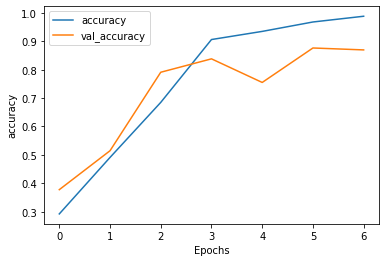

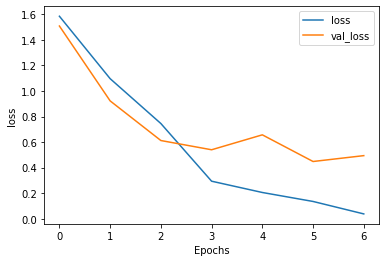

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")